# Predicting Car Fuel Efficiency Using Regression Models on Automobile Data

# Abstract:

This project is to develop a model to predict car fuel efficiency (mpg) based on specifications like cylinders, displacement, horsepower, and weight. This involves preprocessing the data, performing exploratory analysis, and implementing various regression algorithms. We will tune hyperparameters and evaluate models using metrics like R-squared and adjusted R-squared to identify the best-performing model. The goal is to achieve accurate predictions while ensuring model interpretability.

# Objective:

The objective of this project is to analyze the relationship between various car specifications and fuel efficiency (mpg) using historical automobile data from the 1970s and 1980s. We aim to develop a predictive model that accurately estimates fuel efficiency based on factors like the number of cylinders, engine displacement, horsepower, vehicle weight, acceleration, model year, and origin.

# Challenges:

Choosing the appropriate method to identify and manage outliers that can significantly affect model performance.

Ensuring features are on a comparable scale to improve the performance of certain algorithms.

Balancing the accuracy of complex models like Random Forest with the need for interpretability.

Managing the significant computational power required for running multiple models and extensive hyperparameter tuning.

# Libraries Used:

• Pandas - Data manipulation and Analysis.

• NumPy - Numerical computing tasks.

• Seaborn - Data Visualisation.

• Matplotlib.pyplot - Plotting Graphs and Visualisation.

• pd.set_option ("display.max_columns", None): This command ensures that all columns of a DataFrame are shown when printed, without truncation.

• pd.set_option ("display.max_rows", None): This command ensures that all rows of a DataFrame are displayed when printed, without truncation.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Ingestion

In [2]:
df = pd.read_csv('C:\\Users\\Tanvi\\OneDrive\\Dokumen\\OneDrive_2024-05-16\\Fuel Efficiency Prediction and Analysis for Automotive Insights\\autos_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

I have check the shape of the dataset and I found there are 389 rows and 9 columns

In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

# Dataset Columns:

mpg: Car's fuel efficiency measured in miles per gallon.

cylinders: Number of cylinders in the car's engine.

displacement: Engine displacement in cubic inches.

horsepower: Engine power output measured in horsepower.

weight: Car's weight in pounds.

acceleration: Time taken for the car to reach a certain speed from standstill.

model_year: Year of manufacturing or model release.

origin: Country of origin or manufacture of the car.

car_name: Unique identifier for each car instance.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


The table summarizes the key statistics of the dataset, including counts, means, standard deviations, minimum and maximum values, and percentiles, for variables such as fuel efficiency (mpg), cylinders, displacement, weight, acceleration, model year, and origin. It provides insights into the distribution and variability of each variable, aiding in understanding the characteristics of the dataset and potential relationships between variables.

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Checking for Null Values and I found there are 0 null values in each column.

In [9]:
df.duplicated().sum()

0

There are no duplicate values

In [10]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
df['car_name'].nunique()

305

In [12]:
df['origin'].nunique()

3

In [13]:
df['model_year'].nunique()

13

# Exploratory Data Analysis

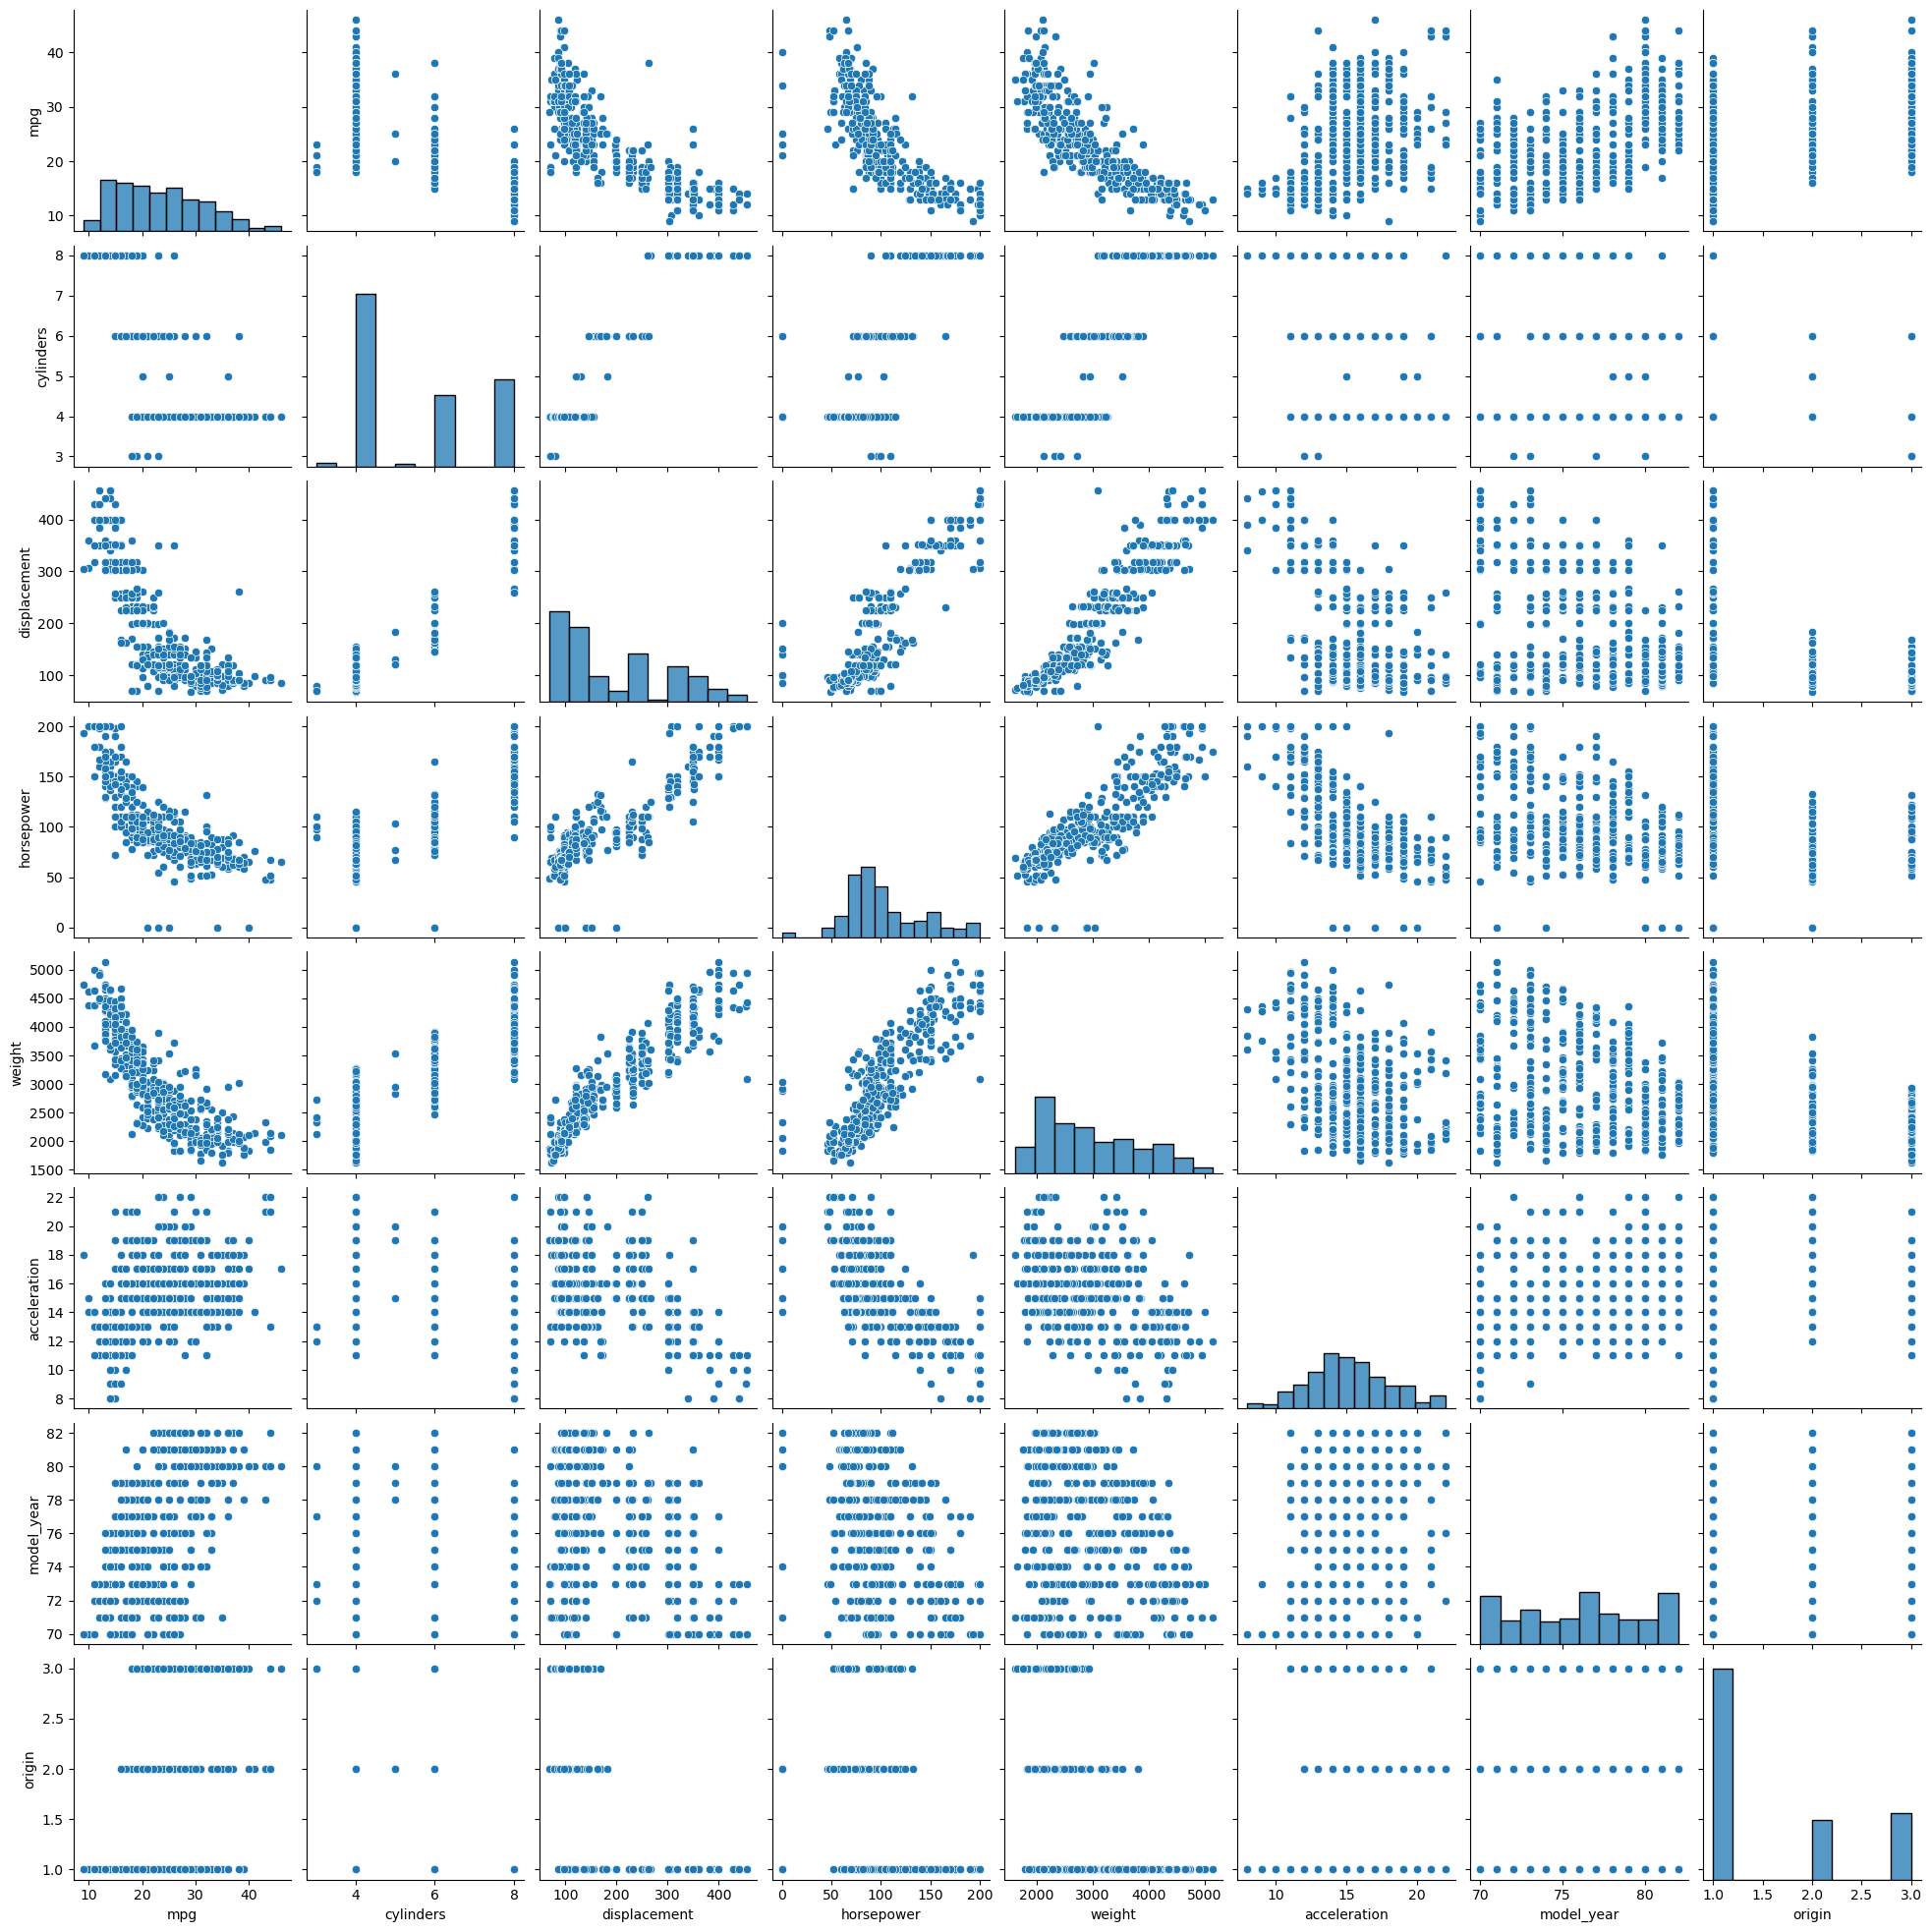

In [55]:
sns.pairplot(df)
plt.show()

C:\Users\Tanvi\AppData\Local\Temp\ipykernel_23208\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

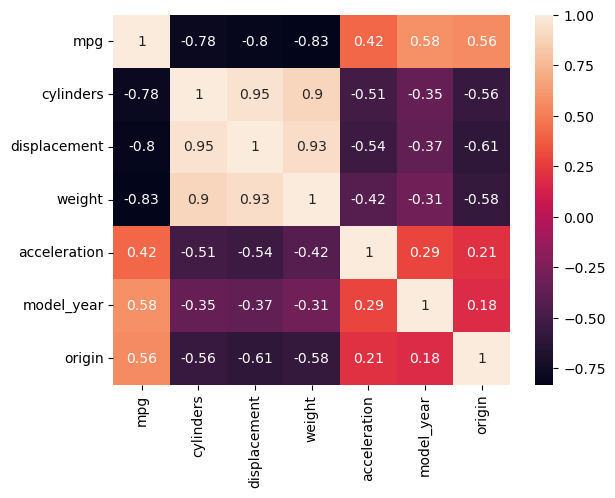

In [15]:
sns.heatmap(df.corr(),annot=True)

# Findings:

In the correlation map, the number of cylinders is highly correlated with displacement at 95%. Additionally, mpg and model year show a 58% correlation, while mpg and weight have a strong negative correlation of -83%. Lastly, mpg and acceleration are moderately correlated at 42%.

In [16]:
# Extracting brand names from car names
df['brand_name'] = df['car_name'].apply(lambda x: x.split()[0])
brand_name_counts = df['brand_name'].value_counts()

This code creates a new column named 'brand_name' in the DataFrame by extracting the first word from the 'car_name' column, which typically represents the brand name of the car. Then, it counts the occurrences of each unique brand name in the dataset using the value_counts() function, storing the results in the 'brand_name_counts' variable.

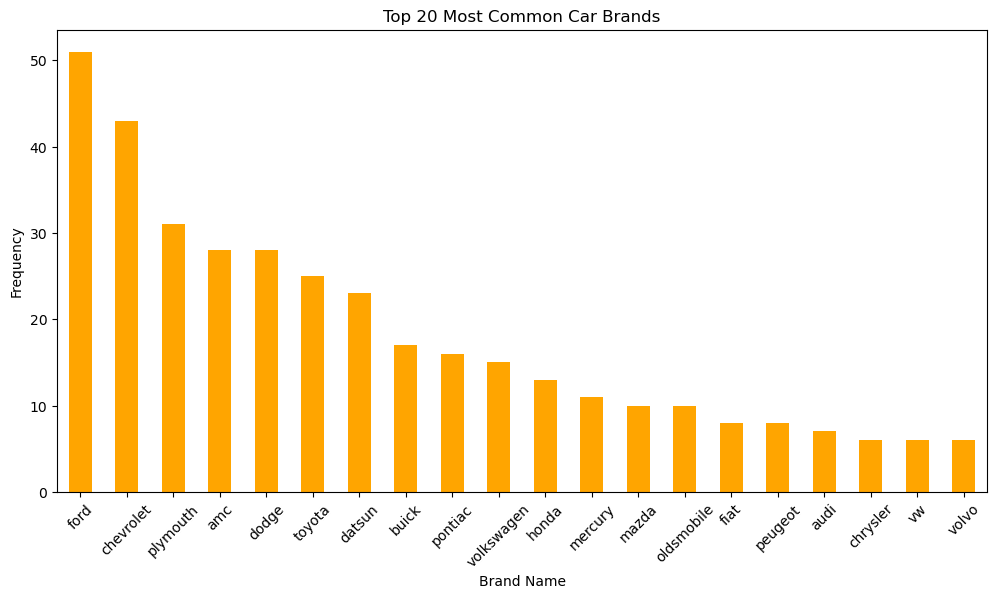

In [17]:
# Plotting
plt.figure(figsize=(12, 6))
brand_name_counts[:20].plot(kind='bar', color='orange')
plt.title('Top 20 Most Common Car Brands')
plt.xlabel('Brand Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Findings:

Ford is the most frequent car brand, with a count exceeding 50, while Chevrolet follows as the second-highest, with a count above 40 but below 50. Volvo is the least frequent brand, with a count below 10.

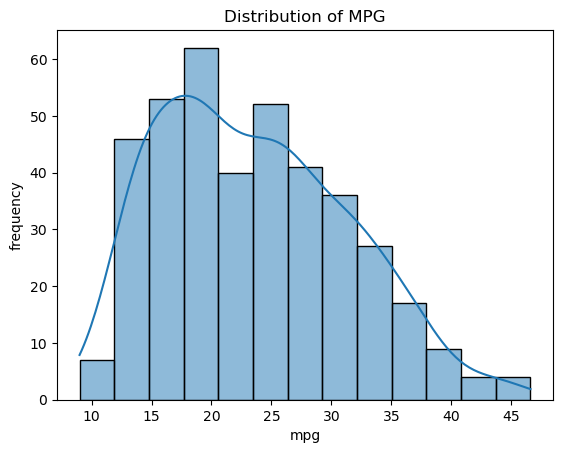

In [18]:
sns.histplot(data=df,x='mpg',kde=True)
plt.ylabel("frequency")
plt.xlabel('mpg')
plt.title('Distribution of MPG')
plt.show()

# Findings:

The distribution diagram depicts that the highest frequency of mpg falls within the range of 15 to 30, while the lowest frequency occurs within the range of 35 to 45.

In [19]:
df['mpg'].skew()

0.45706634399491913

The skewness value of 0.45 suggests that the distribution of the 'mpg' column is moderately skewed to the right.

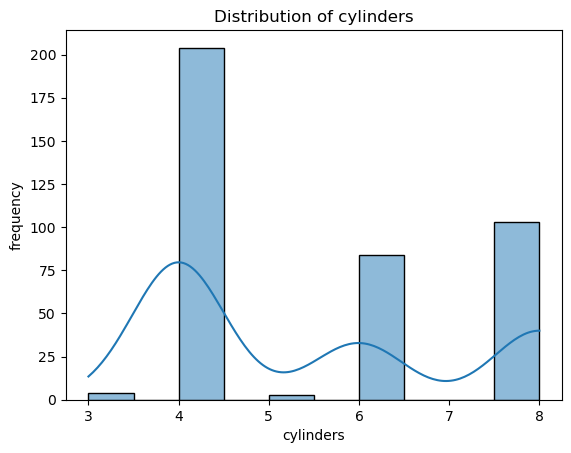

In [20]:
sns.histplot(data=df,x='cylinders',kde=True)
plt.ylabel("frequency")
plt.xlabel('cylinders')
plt.title('Distribution of cylinders')
plt.show()

# Findings:

In the above distribution diagram of cylinders, it shows that the frequency of cars with 4 cylinders is higher compared to other cylinder numbers.

In [21]:
df['cylinders'].skew()

0.5269215453528939

The skewness of the cylinders column is 52%, indicating a moderate rightward skew in the distribution of cylinder counts. This suggests that while most cars have fewer cylinders, there are some cars with higher cylinder counts pulling the distribution to the right.

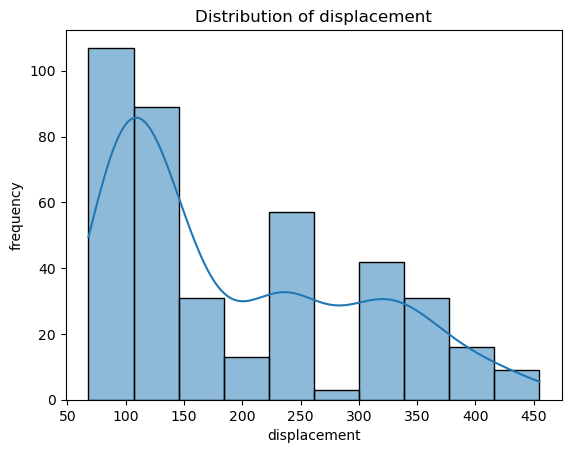

In [22]:
sns.histplot(data=df,x='displacement',kde=True)
plt.ylabel("frequency")
plt.xlabel('displacement')
plt.title('Distribution of displacement')
plt.show()

# Findings:

In the above distribution diagram of the displacement column, it shows that the frequency of displacements ranging from 50 to 100 is higher, whereas the frequency of displacements from 150 to 450 is lower.

In [23]:
df['displacement'].skew()

0.7196451643005952

The skewness of the displacement column is 0.71, indicating a moderate rightward skew in the distribution. This suggests that while most cars have lower displacement values, there are some with higher displacement values pulling the distribution to the right.

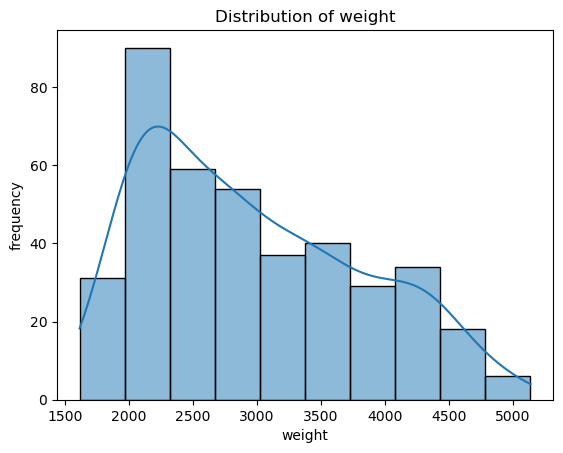

In [24]:
sns.histplot(data=df,x='weight',kde=True)
plt.ylabel("frequency")
plt.xlabel('weight')
plt.title('Distribution of weight')
plt.show()

# Findings:

In the above distribution graph of the weight column, it shows that the frequency of weights ranging from 1500 to 2500 is higher, while the frequency of weights from 3000 to 5000 is lower.

In [25]:
df['weight'].skew()

0.5310625125994629

The skewness of the weight column is 0.53, indicating a moderate rightward skew in the distribution. This suggests that while most cars have lower weights, there are some with higher weights that pull the distribution to the right.

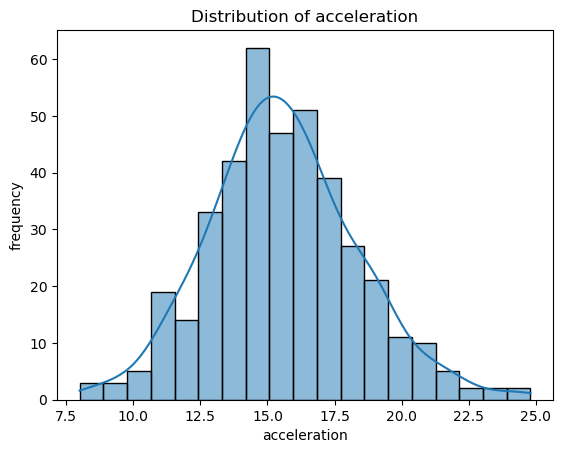

In [26]:
sns.histplot(data=df,x='acceleration',kde=True)
plt.ylabel("frequency")
plt.xlabel('acceleration')
plt.title('Distribution of acceleration')
plt.show()

# Findings:

In the above distribution graph of the acceleration column, it shows that the frequency of acceleration values ranging from 12.5 to 17.5 is higher, while the frequencies for the ranges 7.5 to 10.0 and 20.0 to 25.0 are lower.

In [27]:
df['acceleration'].skew()

0.27877684462588986

The skewness of the acceleration column is 0.27, indicating a slight rightward skew in the distribution.

<Axes: >

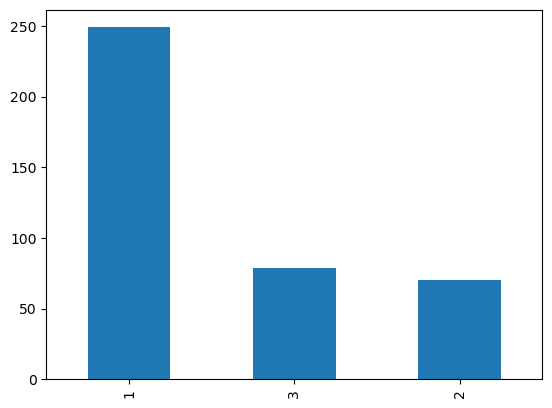

In [29]:
df['origin'].value_counts().plot(kind='bar')

# Findings:

According to the above graph, origin 1 has the highest frequency, with counts exceeding 250. Origins 2 and 3 also have frequencies above 50.

<Axes: xlabel='mpg'>

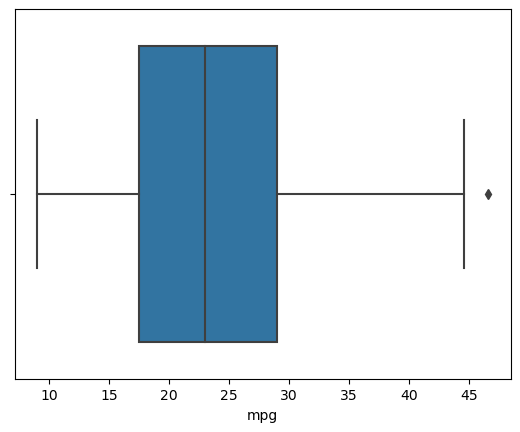

In [30]:
sns.boxplot(x='mpg',data=df)

<Axes: xlabel='displacement'>

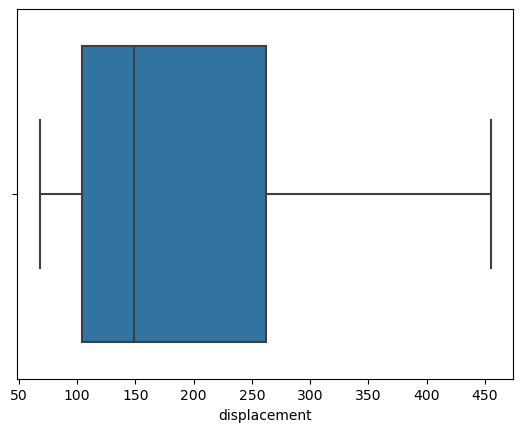

In [31]:
sns.boxplot(x='displacement',data=df)

<Axes: xlabel='weight'>

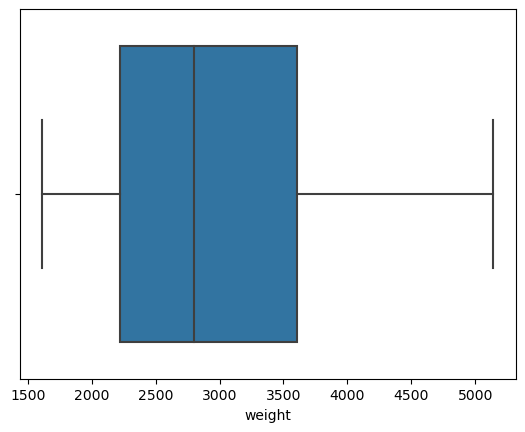

In [32]:
sns.boxplot(x='weight',data=df)

<Axes: xlabel='acceleration'>

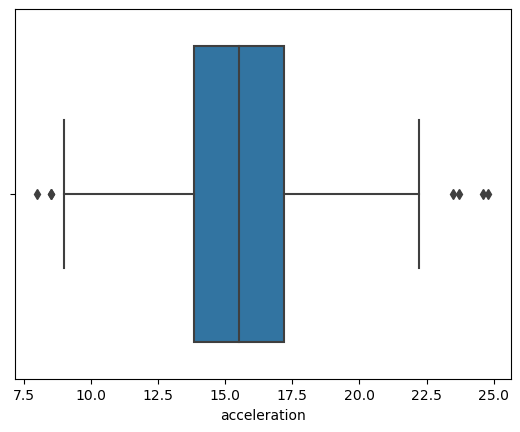

In [33]:
sns.boxplot(x='acceleration',data=df)

In [34]:
df['horsepower'].isnull().sum()

0

In [35]:
df['horsepower'].replace('?', np.nan, inplace=True)

In [36]:
# Convert the column to numeric, forcing invalid parsing to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [37]:
df['horsepower'].isnull().sum()

6

In [38]:
specific_value = 0
df['horsepower'].fillna(specific_value, inplace=True)

In [39]:
df['horsepower'].isnull().sum()

0

<Axes: xlabel='horsepower'>

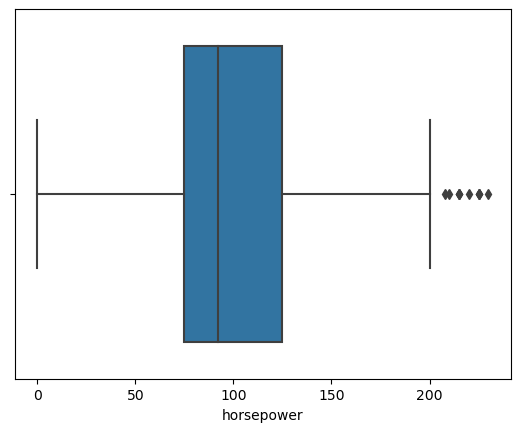

In [40]:
sns.boxplot(x='horsepower',data=df)

# Outlier Detection:

Box plot are the best statistical Measure for Outlier detection.

1)Calculate the first quartile (25th percentile).

2)Calculate the third quartile (75th percentile).

3)Calculate the interquartile range (IQR) as the difference between Q3 and Q1.

4)Calculate the lower limit as Q1 minus 1.5 times the IQR.

5)Calculate the upper limit as Q3 plus 1.5 times the IQR.

6)Apply a lambda function to each value in the column.
If a value is less than the lower limit, it is replaced with the lower limit.
If a value is greater than the upper limit, it is replaced with the upper limit.
Otherwise, the value remains unchanged.

In [41]:
# Define the columns for outlier removal
columns_to_cap = ['horsepower', 'acceleration', 'mpg']

# Calculate the quartiles and IQR for each column
for column in columns_to_cap:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Update the values if they are outliers
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [43]:
print(df[columns_to_cap].describe())

       horsepower  acceleration         mpg
count  398.000000    398.000000  398.000000
mean   102.422111     15.552010   23.513693
std     38.978619      2.693089    7.813400
min      0.000000      8.800000    9.000000
25%     75.000000     13.825000   17.500000
50%     92.000000     15.500000   23.000000
75%    125.000000     17.175000   29.000000
max    200.000000     22.200000   46.250000


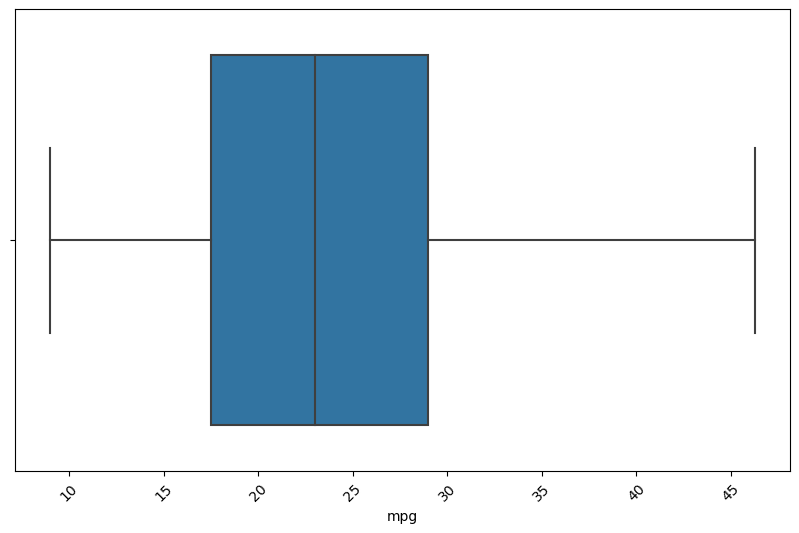

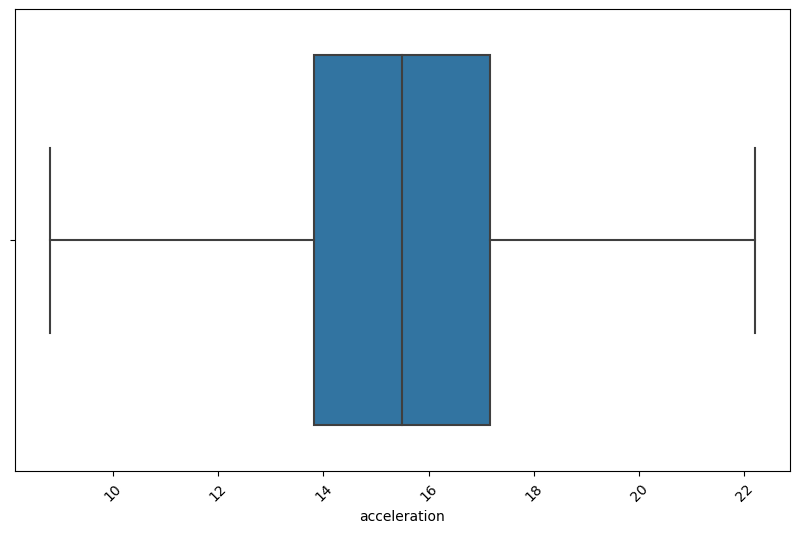

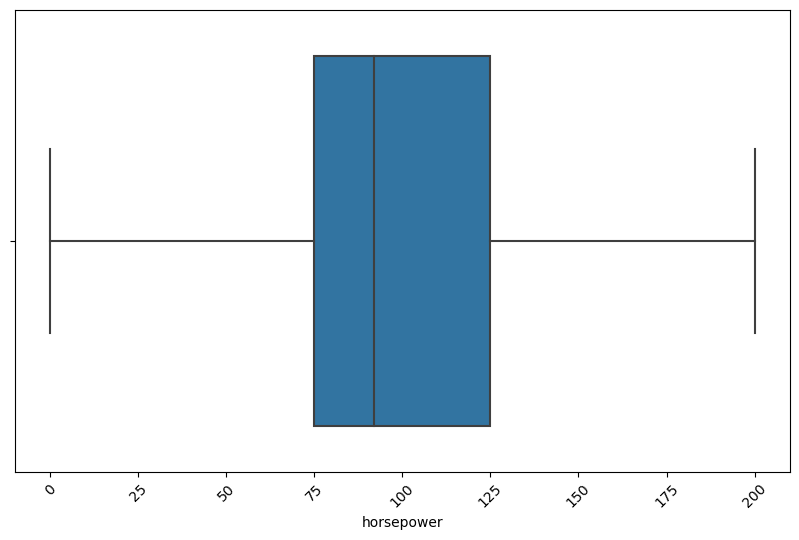

In [44]:
numerical_columns = ['mpg', 'acceleration', 'horsepower']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.xticks(rotation=45)
    plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
 9   brand_name    398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [46]:
df['mpg']=df['mpg'].astype(int)
df['acceleration']=df['acceleration'].astype(int)
df['horsepower']=df['horsepower'].astype(int)

Then I changed the type of mpg,acceleration,horsepower column to interger.

In [47]:
columns_to_drop = ['car_name','brand_name']
df = df.drop(columns=columns_to_drop)

I drop the car_ name and brand_name column

In [48]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18,8,307.0,130,3504,12,70,1
1,15,8,350.0,165,3693,11,70,1
2,18,8,318.0,150,3436,11,70,1
3,16,8,304.0,150,3433,12,70,1
4,17,8,302.0,140,3449,10,70,1


# Data Splitting

In [49]:
#train-test splitt
x = df.drop(columns=['mpg'])  # Features
y = df['mpg']  # Target variable

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)

# Scaling(Normalization)

The provided code utilizes the MinMaxScaler from scikit-learn to perform min-max scaling on numerical features.

The MinMaxScaler scales the features to a fixed range between 0 and 1, ensuring that all features are standardized and have a comparable scale.

This preprocessing step is valuable for machine learning tasks, as it helps mitigate the impact of varying scales among features and facilitates more effective model training and evaluation.

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Model Building

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

def adjusted_r2_score(y_true,y_pred,n,p):
    r2=r2_score(y_true,y_pred)
    adjusted_r2= 1-(1-r2)*((n-1)/(n-p-1))
    return adjusted_r2

# Define a dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
}

evaluation_metrics ={
    "Model":[],
    "MSE":[],
    "RMSE":[],
    "R2 Score":[],
    "Adjusted R2 Score":[]

}


# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    adj_r2= adjusted_r2_score(y_test, y_pred,len(y_test),1)
    
   #store evaluation metrics
    evaluation_metrics["Model"].append(name)
    evaluation_metrics["MSE"].append(mse)
    evaluation_metrics["RMSE"].append(rmse)
    evaluation_metrics["R2 Score"].append(r2)
    evaluation_metrics["Adjusted R2 Score"].append(adj_r2)
    

import pandas as pd
evaluation_df=pd.DataFrame(evaluation_metrics)

print(evaluation_df)


               Model        MSE      RMSE  R2 Score  Adjusted R2 Score
0  Linear Regression   9.049214  3.008191  0.829778           0.827595
1   Ridge Regression   8.867222  2.977788  0.833201           0.831062
2   Lasso Regression  23.324975  4.829594  0.561240           0.555615
3      Decision Tree  11.562500  3.400368  0.782501           0.779712
4  Gradient Boosting  13.549805  3.681006  0.745118           0.741850
5      Random Forest   6.591499  2.567391  0.876009           0.874419


In [62]:
from sklearn.model_selection import GridSearchCV

# Define a dictionary to store models with their respective hyperparameters
models_hyperparameters = {
    'Linear Regression': {'model': LinearRegression(), 'params': {}},
    'Ridge Regression': {'model': Ridge(), 'params': {'alpha': [0.1, 1, 10]}},
    'Lasso Regression': {'model': Lasso(), 'params': {'alpha': [0.1, 1, 10]}},
    'Decision Tree': {'model': DecisionTreeRegressor(), 'params': {'max_depth': [None, 5, 10]}},
    'Gradient Boosting': {'model': GradientBoostingRegressor(), 'params': {'n_estimators': [50, 100, 200]}},
    'Random Forest': {'model': RandomForestRegressor(), 'params': {'n_estimators': [50, 100, 200]}},
}

evaluation_metrics ={
    "Model":[],
    "MSE":[],
    "RMSE":[],
    "R2 Score":[],
    "Adjusted R2 Score":[]
}

# Train and evaluate each model with hyperparameter tuning
for name, model_data in models_hyperparameters.items():
    model = model_data['model']
    params = model_data['params']
    
    grid_search = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(x_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(y_test, y_pred, len(y_test), 1)
    
    # Store evaluation metrics
    evaluation_metrics["Model"].append(name)
    evaluation_metrics["MSE"].append(mse)
    evaluation_metrics["RMSE"].append(rmse)
    evaluation_metrics["R2 Score"].append(r2)
    evaluation_metrics["Adjusted R2 Score"].append(adj_r2)

# Convert to DataFrame and print
evaluation_df = pd.DataFrame(evaluation_metrics)
print(evaluation_df)

               Model        MSE      RMSE  R2 Score  Adjusted R2 Score
0  Linear Regression   9.049214  3.008191  0.829778           0.827595
1   Ridge Regression   8.991035  2.998505  0.830872           0.828704
2   Lasso Regression   8.494654  2.914559  0.840209           0.838161
3      Decision Tree   9.319984  3.052865  0.824684           0.822436
4  Gradient Boosting  15.338502  3.916440  0.711471           0.707772
5      Random Forest   6.462573  2.542159  0.878434           0.876876


# Conclusion:

After hyperparameter tuning, the models exhibit varying performance metrics on the test data:

1)Lasso Regression achieved the lowest Mean Squared Error (MSE) of 8.49 and Root Mean Squared Error (RMSE) of 2.91, indicating the best performance in terms of prediction accuracy among the tested models.

2)Ridge Regression also performed well, closely following Lasso Regression with an MSE of 8.99 and RMSE of 2.99.

3)Random Forest exhibited the highest R-squared score of 0.88, indicating a good fit to the data. However, its performance in terms of MSE and RMSE was not as good as Lasso and Ridge Regression.

4)Gradient Boosting achieved an R-squared score of 0.71, which is lower compared to other models, suggesting that it may not be as effective in capturing the variability in the data.

5)Overall, Lasso and Ridge Regression models performed the best after hyperparameter tuning, providing the lowest MSE and RMSE values, indicating superior predictive performance on the test data compared to other models.